In [1]:
from pathlib import Path
import json

import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
PLOT_MODEL_ORDER = ["fnn", "small_cnn", "mnist", "lenet5"]

In [4]:
RUNS_FOR_ANALYSIS = [
    # "default_metrics",
    "polynomial_test"
]

In [5]:
NON_METRIC_COLUMNS = [
    "run", "seed", "timestamp", "model",
]

## Set up

In [6]:
REPO_ROOT = Path().absolute().parent
REPO_ROOT

PosixPath('/home/tomaz/git/Politecnico/Projects/zkp-vml-research/my-work/ezkl')

### Allow import from non-packaged code

In [7]:
import sys

sys.path.append(str(REPO_ROOT / "src"))

In [8]:
from model import ModelAttributes, ModelPaths

## Extract

### Load JSON metric files

In [9]:
model_paths: dict[str, Path] = {
    model.model_name: ModelPaths(model.model_name).metrics
    for model in ModelAttributes
}
model_paths

{'fnn': PosixPath('/home/tomaz/git/Politecnico/Projects/zkp-vml-research/my-work/ezkl/output/fnn/metrics.json'),
 'small_cnn': PosixPath('/home/tomaz/git/Politecnico/Projects/zkp-vml-research/my-work/ezkl/output/small_cnn/metrics.json'),
 'mnist': PosixPath('/home/tomaz/git/Politecnico/Projects/zkp-vml-research/my-work/ezkl/output/mnist/metrics.json'),
 'lenet5': PosixPath('/home/tomaz/git/Politecnico/Projects/zkp-vml-research/my-work/ezkl/output/lenet5/metrics.json'),
 'vgg11': PosixPath('/home/tomaz/git/Politecnico/Projects/zkp-vml-research/my-work/ezkl/output/vgg11/metrics.json')}

In [10]:
metrics_list: list[pd.DataFrame] = []
for name, path in model_paths.items():
    with path.open("r") as f:
        metric_records = json.load(f)
    model_df = pd.json_normalize(metric_records)
    model_df["model"] = name
    metrics_list.append(model_df)
all_metrics_df = pd.concat(metrics_list).convert_dtypes()
all_metrics_df

,run,seed,timestamp,export_wall_time,export_process_time,calibrate_wall_time,calibrate_process_time,generate_wall_time,generate_process_time,verify_wall_time,verify_process_time,export_size,proofer_key_size,verifier_key_size,proof_size,model
0,default_metrics,0,2024-07-13T14:57:04.105975,117530355,117531008,9214144074,19453668441,490866003,2137182059,10125018,21227545,5887,3935363,2951,21336,fnn
1,default_metrics,1,2024-07-13T15:02:42.683818,10396552,10398236,9236564320,19654010433,519524388,2164424498,9209611,20494353,5887,3935363,2951,21247,fnn
2,default_metrics,2,2024-07-13T15:08:30.241878,7990629,7991996,9015955011,19231980654,468176909,2006002317,12758503,25720793,5887,3935363,2951,21300,fnn
3,default_metrics,3,2024-07-13T15:14:10.998356,9518875,9520797,8744947993,18772565736,493402244,2035191865,9633364,21812470,5887,3541995,2823,20068,fnn
4,default_metrics,4,2024-07-13T15:19:48.059491,11942534,11944263,9523164294,20501189049,521794655,2188296274,9274557,21031518,5887,3935363,2951,21280,fnn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,polynomial_test_polynomial,6,2024-07-16T08:51:37.459577,125663453,387872003,390560536514,1627742385806,135610541313,479160147304,133825132,145007850,248901,1107887643,591111,176035,lenet5
27,polynomial_test_polynomial,7,2024-07-16T09:00:24.297531,94667673,328915855,379297228424,1571596720772,131607989933,464576158004,149191204,163772046,248901,1107887643,591111,176086,lenet5
28,polynomial_test_polynomial,8,2024-07-16T09:08:55.949546,150078366,446629990,354999648935,1475913496260,139953754983,471396065052,214722685,231411376,248901,1107887643,591111,176027,lenet5
29,polynomial_test_polynomial,9,2024-07-16T09:17:11.858818,124908254,346234141,357423450572,1502865713616,135198472096,474838693548,134062452,150810031,248901,1107887643,591111,175941,lenet5


In [11]:
all_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 0
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   run                     61 non-null     string
 1   seed                    60 non-null     Int64 
 2   timestamp               61 non-null     string
 3   export_wall_time        61 non-null     Int64 
 4   export_process_time     61 non-null     Int64 
 5   calibrate_wall_time     60 non-null     Int64 
 6   calibrate_process_time  60 non-null     Int64 
 7   generate_wall_time      60 non-null     Int64 
 8   generate_process_time   60 non-null     Int64 
 9   verify_wall_time        60 non-null     Int64 
 10  verify_process_time     60 non-null     Int64 
 11  export_size             61 non-null     Int64 
 12  proofer_key_size        60 non-null     Int64 
 13  verifier_key_size       60 non-null     Int64 
 14  proof_size              60 non-null     Int64 
 15  model         

### Filter only relevant runs

In [12]:
if RUNS_FOR_ANALYSIS:
    metrics_df = all_metrics_df[all_metrics_df["run"].str.match("|".join(RUNS_FOR_ANALYSIS))]
else:
    metrics_df = all_metrics_df
metrics_df.run.unique()

<StringArray>
['polynomial_test_relu', 'polynomial_test_polynomial']
Length: 2, dtype: string

## Transform

### Convert time units to milliseconds

Time is captured in nanoseconds, so we must divide by `1e6`

In [13]:
time_columns = metrics_df.columns[metrics_df.columns.str.match(r".*?_time$")]
time_columns

Index(['export_wall_time', 'export_process_time', 'calibrate_wall_time',
       'calibrate_process_time', 'generate_wall_time', 'generate_process_time',
       'verify_wall_time', 'verify_process_time'],
      dtype='object')

Just to avoid incompatible type warning from pandas

In [14]:
metrics_df[time_columns] = metrics_df[time_columns].apply(lambda col: col.astype("float64"))
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 10 to 29
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   run                     20 non-null     string 
 1   seed                    20 non-null     Int64  
 2   timestamp               20 non-null     string 
 3   export_wall_time        20 non-null     float64
 4   export_process_time     20 non-null     float64
 5   calibrate_wall_time     20 non-null     float64
 6   calibrate_process_time  20 non-null     float64
 7   generate_wall_time      20 non-null     float64
 8   generate_process_time   20 non-null     float64
 9   verify_wall_time        20 non-null     float64
 10  verify_process_time     20 non-null     float64
 11  export_size             20 non-null     Int64  
 12  proofer_key_size        20 non-null     Int64  
 13  verifier_key_size       20 non-null     Int64  
 14  proof_size              20 non-null     Int64  


/tmp/ipykernel_108620/2642626609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df[time_columns] = metrics_df[time_columns].apply(lambda col: col.astype("float64"))


In [15]:
time_converted_to_ms = False

In [16]:
if not time_converted_to_ms:
    metrics_df.loc[:, time_columns] = metrics_df[time_columns] / 1e6
    time_converted_to_ms = True
metrics_df

,run,seed,timestamp,export_wall_time,export_process_time,calibrate_wall_time,calibrate_process_time,generate_wall_time,generate_process_time,verify_wall_time,verify_process_time,export_size,proofer_key_size,verifier_key_size,proof_size,model
10,polynomial_test_relu,0,2024-07-15T13:06:03.583346,754.435722,481.120660,184461.885465,8.862202e+05,104912.181324,411605.169719,228.570554,244.513112,248729,1309280075,656903,179159,lenet5
11,polynomial_test_relu,1,2024-07-15T13:10:54.546740,46.848791,111.757174,176744.037260,8.773791e+05,98556.690769,392646.346602,92.459623,106.803016,248729,1309280075,656903,179163,lenet5
12,polynomial_test_relu,2,2024-07-15T13:15:30.454349,74.603636,159.072057,179125.013532,8.752690e+05,106181.741928,417084.581704,94.944500,108.610995,248729,1309280075,656903,179099,lenet5
13,polynomial_test_relu,3,2024-07-15T13:20:16.306836,69.286588,273.106498,190998.355300,9.210778e+05,97414.940366,383631.303177,144.488064,157.613052,248729,1309280075,656903,179337,lenet5
14,polynomial_test_relu,4,2024-07-15T13:25:05.186452,87.168811,241.906126,181715.880563,8.974696e+05,101874.672115,406257.572591,84.640603,99.517457,248729,1309280075,656903,179303,lenet5
15,polynomial_test_relu,5,2024-07-15T13:29:49.415796,40.502367,121.794636,173207.722994,8.587855e+05,105805.973800,415244.432321,139.084084,154.907457,248729,1309280075,656903,179222,lenet5
16,polynomial_test_relu,6,2024-07-15T13:34:28.947735,57.704403,154.012184,179849.067905,8.886699e+05,96253.181966,382399.529316,133.818729,151.986497,248729,1309280075,656903,179150,lenet5
17,polynomial_test_relu,7,2024-07-15T13:39:05.841980,34.553682,100.390838,179512.987682,8.912144e+05,95159.166487,381528.639694,127.219918,140.167975,248729,1309280075,656903,179249,lenet5
18,polynomial_test_relu,8,2024-07-15T13:43:41.037128,63.535359,165.789807,189602.853317,9.377639e+05,93848.781472,377372.061328,118.084322,131.481709,248729,1309280075,656903,179258,lenet5
19,polynomial_test_relu,9,2024-07-15T13:48:24.956882,43.032939,157.337590,179717.054435,8.901132e+05,98250.074893,398001.394522,119.259055,133.163104,248729,1309280075,656903,179115,lenet5


### Add up total proof size

An `ezkl` proof consists of the witness, verifier key and proof.

I forgot to capture the witness size in the initial runs so it may not be present in the `DataFrame` and we need to handle that

In [17]:
if "witness_size" not in metrics_df:
    metrics_df["witness_size"] = 0

/tmp/ipykernel_108620/1350088245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df["witness_size"] = 0


In [18]:
metrics_df["total_proof_size"] = (
    metrics_df["witness_size"]
    + metrics_df["verifier_key_size"]
    + metrics_df["proof_size"]
)
metrics_df

/tmp/ipykernel_108620/2886658907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_df["total_proof_size"] = (


,run,seed,timestamp,export_wall_time,export_process_time,calibrate_wall_time,calibrate_process_time,generate_wall_time,generate_process_time,verify_wall_time,verify_process_time,export_size,proofer_key_size,verifier_key_size,proof_size,model,witness_size,total_proof_size
10,polynomial_test_relu,0,2024-07-15T13:06:03.583346,754.435722,481.120660,184461.885465,8.862202e+05,104912.181324,411605.169719,228.570554,244.513112,248729,1309280075,656903,179159,lenet5,0,836062
11,polynomial_test_relu,1,2024-07-15T13:10:54.546740,46.848791,111.757174,176744.037260,8.773791e+05,98556.690769,392646.346602,92.459623,106.803016,248729,1309280075,656903,179163,lenet5,0,836066
12,polynomial_test_relu,2,2024-07-15T13:15:30.454349,74.603636,159.072057,179125.013532,8.752690e+05,106181.741928,417084.581704,94.944500,108.610995,248729,1309280075,656903,179099,lenet5,0,836002
13,polynomial_test_relu,3,2024-07-15T13:20:16.306836,69.286588,273.106498,190998.355300,9.210778e+05,97414.940366,383631.303177,144.488064,157.613052,248729,1309280075,656903,179337,lenet5,0,836240
14,polynomial_test_relu,4,2024-07-15T13:25:05.186452,87.168811,241.906126,181715.880563,8.974696e+05,101874.672115,406257.572591,84.640603,99.517457,248729,1309280075,656903,179303,lenet5,0,836206
15,polynomial_test_relu,5,2024-07-15T13:29:49.415796,40.502367,121.794636,173207.722994,8.587855e+05,105805.973800,415244.432321,139.084084,154.907457,248729,1309280075,656903,179222,lenet5,0,836125
16,polynomial_test_relu,6,2024-07-15T13:34:28.947735,57.704403,154.012184,179849.067905,8.886699e+05,96253.181966,382399.529316,133.818729,151.986497,248729,1309280075,656903,179150,lenet5,0,836053
17,polynomial_test_relu,7,2024-07-15T13:39:05.841980,34.553682,100.390838,179512.987682,8.912144e+05,95159.166487,381528.639694,127.219918,140.167975,248729,1309280075,656903,179249,lenet5,0,836152
18,polynomial_test_relu,8,2024-07-15T13:43:41.037128,63.535359,165.789807,189602.853317,9.377639e+05,93848.781472,377372.061328,118.084322,131.481709,248729,1309280075,656903,179258,lenet5,0,836161
19,polynomial_test_relu,9,2024-07-15T13:48:24.956882,43.032939,157.337590,179717.054435,8.901132e+05,98250.074893,398001.394522,119.259055,133.163104,248729,1309280075,656903,179115,lenet5,0,836018


## Analyse

In [19]:
molten_metrics_df = metrics_df.melt(
    id_vars=NON_METRIC_COLUMNS,
)
molten_metrics_df

,run,seed,timestamp,model,variable,value
0,polynomial_test_relu,0,2024-07-15T13:06:03.583346,lenet5,export_wall_time,754.435722
1,polynomial_test_relu,1,2024-07-15T13:10:54.546740,lenet5,export_wall_time,46.848791
2,polynomial_test_relu,2,2024-07-15T13:15:30.454349,lenet5,export_wall_time,74.603636
3,polynomial_test_relu,3,2024-07-15T13:20:16.306836,lenet5,export_wall_time,69.286588
4,polynomial_test_relu,4,2024-07-15T13:25:05.186452,lenet5,export_wall_time,87.168811
...,...,...,...,...,...,...
275,polynomial_test_polynomial,5,2024-07-16T08:44:35.328659,lenet5,total_proof_size,767095.0
276,polynomial_test_polynomial,6,2024-07-16T08:51:37.459577,lenet5,total_proof_size,767146.0
277,polynomial_test_polynomial,7,2024-07-16T09:00:24.297531,lenet5,total_proof_size,767197.0
278,polynomial_test_polynomial,8,2024-07-16T09:08:55.949546,lenet5,total_proof_size,767138.0


In [20]:
time_metrics = time_columns.to_series().apply(lambda col_name: col_name.split("_")[0]).unique()
time_metrics

array(['export', 'calibrate', 'generate', 'verify'], dtype=object)

### Comparison between models

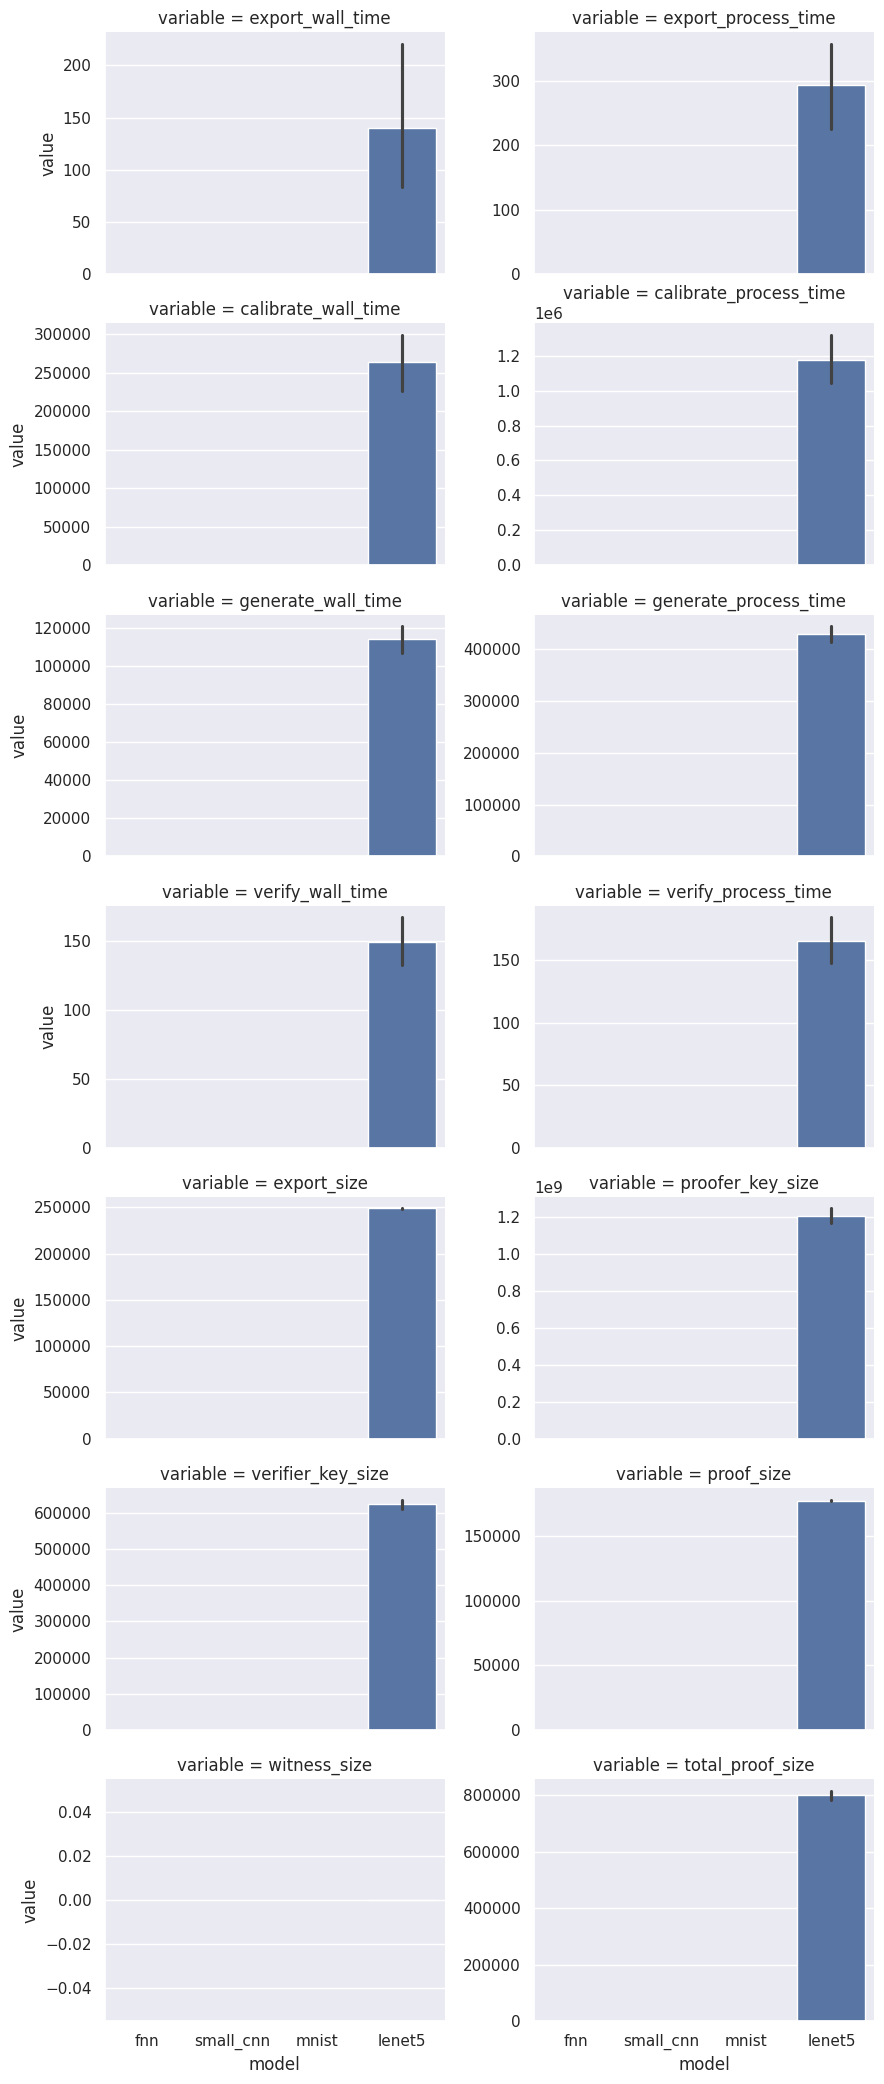

In [21]:
g = sns.FacetGrid(
    molten_metrics_df,
    col="variable",
    sharey=False,
    col_wrap=2,
    aspect=1.5,
)
g.map(sns.barplot, "model", "value", order=PLOT_MODEL_ORDER)

In [22]:
process_multiple_df = metrics_df[NON_METRIC_COLUMNS].copy()
for time_metric in time_metrics:
    wall_metric = f"{time_metric}_wall_time"
    process_metric = f"{time_metric}_process_time"
    process_multiple_df[f"{time_metric}_process_multiple"] = metrics_df[process_metric] / metrics_df[wall_metric]
process_multiple_df


,run,seed,timestamp,model,export_process_multiple,calibrate_process_multiple,generate_process_multiple,verify_process_multiple
10,polynomial_test_relu,0,2024-07-15T13:06:03.583346,lenet5,0.637723,4.804354,3.923331,1.069749
11,polynomial_test_relu,1,2024-07-15T13:10:54.546740,lenet5,2.385487,4.964123,3.983964,1.155131
12,polynomial_test_relu,2,2024-07-15T13:15:30.454349,lenet5,2.132229,4.886358,3.928025,1.143942
13,polynomial_test_relu,3,2024-07-15T13:20:16.306836,lenet5,3.941694,4.822438,3.938116,1.090838
14,polynomial_test_relu,4,2024-07-15T13:25:05.186452,lenet5,2.775145,4.938862,3.987817,1.175765
15,polynomial_test_relu,5,2024-07-15T13:29:49.415796,lenet5,3.007099,4.958125,3.924584,1.113768
16,polynomial_test_relu,6,2024-07-15T13:34:28.947735,lenet5,2.668985,4.941198,3.972851,1.135764
17,polynomial_test_relu,7,2024-07-15T13:39:05.841980,lenet5,2.905359,4.964623,4.009373,1.101777
18,polynomial_test_relu,8,2024-07-15T13:43:41.037128,lenet5,2.609410,4.945938,4.021065,1.113456
19,polynomial_test_relu,9,2024-07-15T13:48:24.956882,lenet5,3.656213,4.952859,4.050902,1.116587


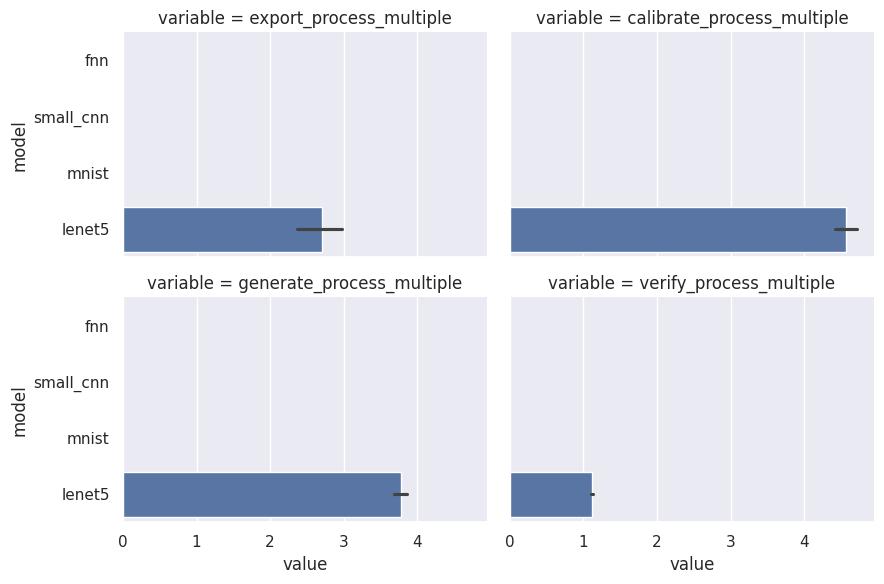

In [23]:
g = sns.FacetGrid(
    process_multiple_df.melt(NON_METRIC_COLUMNS),
    col="variable",
    col_wrap=2,
    aspect=1.5,
)
g.map(sns.barplot, "value", "model", order=PLOT_MODEL_ORDER)

### Polynomial vs ReLU activation

In [24]:
molten_metrics_df["relu"] = molten_metrics_df["run"].str.contains("relu")
molten_metrics_df

,run,seed,timestamp,model,variable,value,relu
0,polynomial_test_relu,0,2024-07-15T13:06:03.583346,lenet5,export_wall_time,754.435722,True
1,polynomial_test_relu,1,2024-07-15T13:10:54.546740,lenet5,export_wall_time,46.848791,True
2,polynomial_test_relu,2,2024-07-15T13:15:30.454349,lenet5,export_wall_time,74.603636,True
3,polynomial_test_relu,3,2024-07-15T13:20:16.306836,lenet5,export_wall_time,69.286588,True
4,polynomial_test_relu,4,2024-07-15T13:25:05.186452,lenet5,export_wall_time,87.168811,True
...,...,...,...,...,...,...,...
275,polynomial_test_polynomial,5,2024-07-16T08:44:35.328659,lenet5,total_proof_size,767095.0,False
276,polynomial_test_polynomial,6,2024-07-16T08:51:37.459577,lenet5,total_proof_size,767146.0,False
277,polynomial_test_polynomial,7,2024-07-16T09:00:24.297531,lenet5,total_proof_size,767197.0,False
278,polynomial_test_polynomial,8,2024-07-16T09:08:55.949546,lenet5,total_proof_size,767138.0,False


In [34]:
molten_metrics_df

,run,seed,timestamp,model,variable,value,relu
0,polynomial_test_relu,0,2024-07-15T13:06:03.583346,lenet5,export_wall_time,754.435722,True
1,polynomial_test_relu,1,2024-07-15T13:10:54.546740,lenet5,export_wall_time,46.848791,True
2,polynomial_test_relu,2,2024-07-15T13:15:30.454349,lenet5,export_wall_time,74.603636,True
3,polynomial_test_relu,3,2024-07-15T13:20:16.306836,lenet5,export_wall_time,69.286588,True
4,polynomial_test_relu,4,2024-07-15T13:25:05.186452,lenet5,export_wall_time,87.168811,True
...,...,...,...,...,...,...,...
275,polynomial_test_polynomial,5,2024-07-16T08:44:35.328659,lenet5,total_proof_size,767095.0,False
276,polynomial_test_polynomial,6,2024-07-16T08:51:37.459577,lenet5,total_proof_size,767146.0,False
277,polynomial_test_polynomial,7,2024-07-16T09:00:24.297531,lenet5,total_proof_size,767197.0,False
278,polynomial_test_polynomial,8,2024-07-16T09:08:55.949546,lenet5,total_proof_size,767138.0,False


/home/tomaz/git/Politecnico/Projects/zkp-vml-research/my-work/ezkl/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


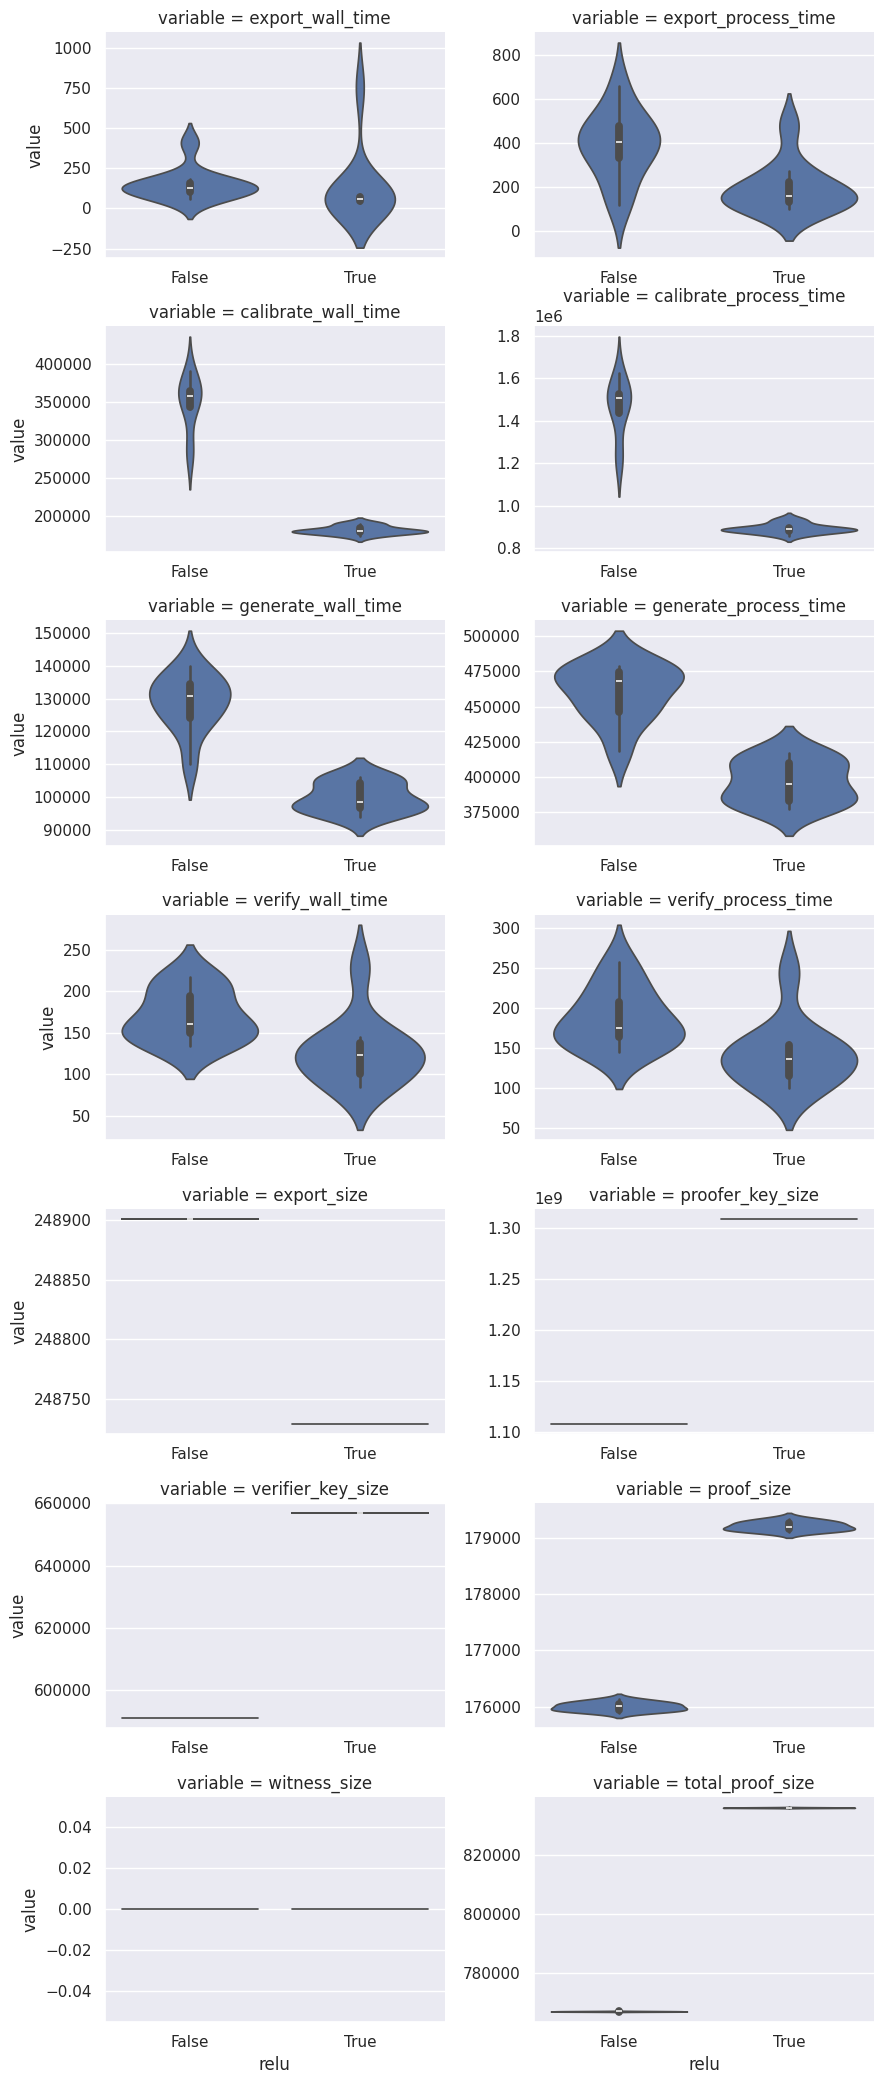

In [41]:
g = sns.FacetGrid(
    molten_metrics_df,
    col="variable",
    sharey=False,
    sharex=False,
    col_wrap=2,
    aspect=1.5,
)
g.map(sns.violinplot, "relu", "value")

### Generate comparative table

In [26]:
aggregated_metrics_df = metrics_df.groupby("model").describe(percentiles=())
aggregated_metrics_df

seed                               export_wall_time              \
       count mean       std  min  50%  max            count        mean   
model                                                                     
lenet5  20.0  4.5  2.946898  0.0  4.5  9.0             20.0  139.676054   

                               ... witness_size                 \
               std        min  ...          std  min  50%  max   
model                          ...                               
lenet5  166.741216  34.553682  ...          0.0  0.0  0.0  0.0   

       total_proof_size                                                         
                  count       mean           std       min       50%       max  
model                                                                           
lenet5             20.0  801612.35  35392.385438  767009.0  801623.5  836240.0  

[1 rows x 90 columns]

In [27]:
table_metrics_df = aggregated_metrics_df[
    ["generate_wall_time", "verify_wall_time", "total_proof_size"]
].drop(columns=["count", "50%"], level=1)
table_metrics_df = table_metrics_df.rename(
    {
        "generate_wall_time": "Proving time [ms]",
        "verify_wall_time": "Verification time [ms]",
        "total_proof_size": "Proof size [bytes]",
    },
    axis="columns",
)
table_metrics_df

Proving time [ms]                                             \
                    mean           std           min            max   
model                                                                 
lenet5     114282.923705  16267.184209  93848.781472  139953.754983   

       Verification time [ms]                                    \
                         mean        std        min         max   
model                                                             
lenet5             149.257016  41.353171  84.640603  228.570554   

       Proof size [bytes]                                    
                     mean           std       min       max  
model                                                        
lenet5          801612.35  35392.385438  767009.0  836240.0

In [28]:
with Path("tables.md").open("w") as f:
    for model, row in table_metrics_df.iterrows():
        f.writelines(("\n", f"### {model}", "\n"))
        f.write(
            row.to_frame()
            .reset_index()
            .pivot_table(index="level_0", columns="level_1")
            [[(model, metric) for metric in ("mean", "max", "min", "std")]]
            .to_latex(
                float_format="%.2f",
                index_names=False,
                escape=True,
                caption=model,
                position="htb",
            )
        )
        f.write("\n")